In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (30,12)

In [2]:
rain = pd.read_csv('sydney-rain.csv')
rain.rename(columns = {'Monthly Precipitation Total (millimetres)': 'mm'}, inplace=True)

In [3]:
def calc_period(row):
    # return pd.Period(year=row['Year'], month=row['Month'], freq='M')
    return "{year}/{month:0>2}/01".format(year=row['Year'], month=row['Month'])

In [4]:
rain['date'] = rain.apply(calc_period, axis=1)
rain['date'] = pd.to_datetime(rain['date'])
rain.dtypes

Product code              object
Station number             int64
Year                       int64
Month                      int64
mm                       float64
Quality                   object
date              datetime64[ns]
dtype: object

In [5]:
import matplotlib.dates as mdates
# rain trendline.
x = mdates.date2num(rain['date'])
d = np.polyfit(x, rain['mm'], 1)
f = np.poly1d(d)
rain.insert(7, 'trend', f(x))

In [6]:
x
# rain

array([-31045., -31014., -30986., ...,  18962.,  18993.,  19024.])

Text(40, -20, '106.2')

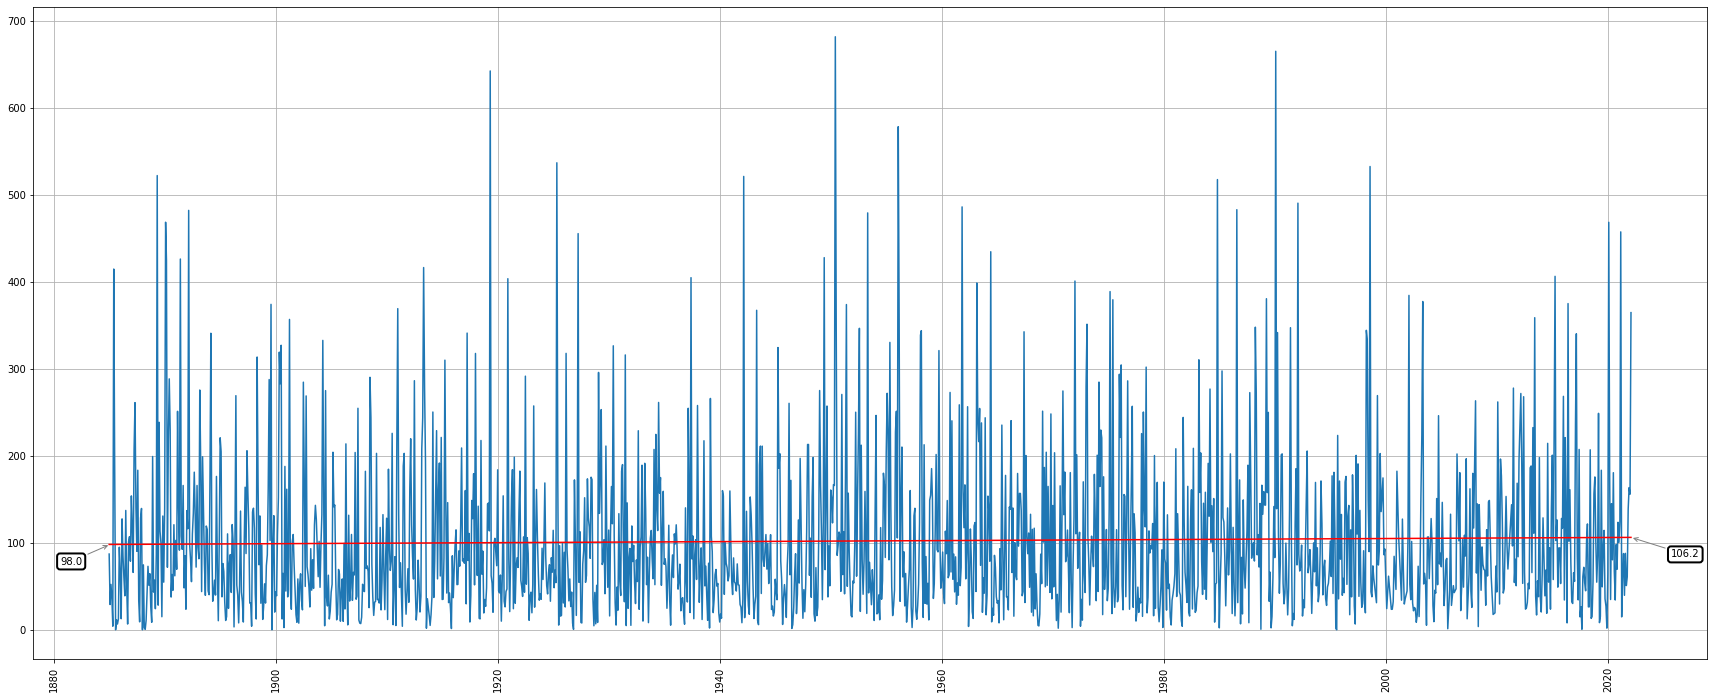

In [13]:
fig, ax = plt.subplots()
p1 = ax.plot(
    rain['date'], rain['mm']
)
p2 = ax.plot(
    rain['date'], rain['trend'], color='Red'
)

# tickes and grid.
plt.xticks(rotation=90)
plt.grid()

# add annotation for trend line.
first = rain.iloc[1]
first_label = f"{first['trend']:.1f}"
last = rain.iloc[-1]
last_label = f"{last['trend']:.1f}"
box_style = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
arrow_style = dict(arrowstyle="->", color="0.5")
ax.annotate(
    first_label,
    xy=(first['date'], first['trend']),
    xytext=(-50, -20),
    textcoords='offset points',
    bbox=box_style,
    arrowprops=arrow_style
)
ax.annotate(
    last_label,
    xy=(last['date'], last['trend']),
    xytext=(40, -20),
    textcoords='offset points',
    bbox=box_style,
    arrowprops=arrow_style
)

# plt.show()

<AxesSubplot:title={'center':'hello'}, xlabel='date', ylabel='mm'>

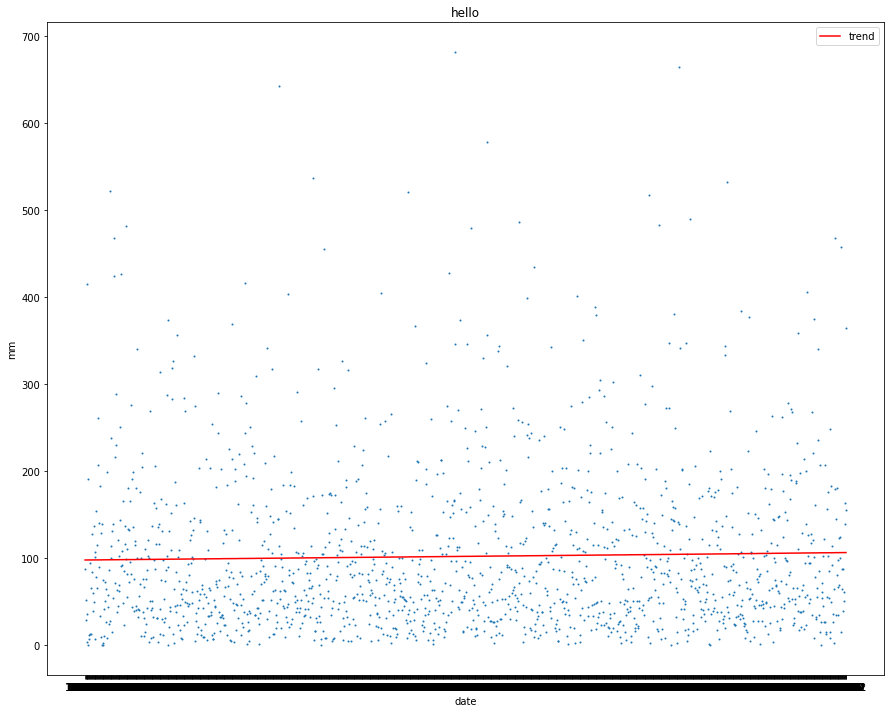

In [153]:
ax = rain.plot.scatter(
    x='date', y='mm',
    title='hello',
    grid=True,
    s=1
)
rain.plot(x='date', y='trend', color='Red', ax=ax)